# 交叉验证、岭回归与LASSO回归
https://www.bilibili.com/video/BV1oR4y197n2/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=eb54fab8ff9874cf7378b4cfd5ece052

## $\S1$ 通过SciKit-Learn实现K-Fold交叉验证

In [2]:
# Before We Begin:
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score 

In [3]:
# Data Loading:
california = datasets.fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
X = california.data
y = california.target
X,y

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)))

In [5]:
# Simple Cross-Validation
## Shuffle参数决定每次分割前是否会打乱数据集，Randon_State参数决定随机状态种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test

(array([[   3.8372    ,   41.        ,    5.26595745, ...,    3.01276596,
           33.91      , -118.29      ],
        [   8.0069    ,   52.        ,    7.22403259, ...,    2.598778  ,
           37.73      , -122.46      ],
        [   3.6712    ,   30.        ,    3.65998256, ...,    2.3347864 ,
           37.46      , -122.15      ],
        ...,
        [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
           34.03      , -118.38      ],
        [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
           37.58      , -121.96      ],
        [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
           37.77      , -122.42      ]], shape=(18576, 8)),
 array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
           36.06      , -119.01      ],
        [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
           35.14      , -119.46      ],
        [   3.4801    ,   52.        ,    3.97715472, .

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
## 样本内R^2
print(f"样本内R^2: {reg.score(X_train, y_train)}")
## 样本外R^2
print(f"样本外R^2: {reg.score(X_test, y_test)}")

样本内R^2: 0.609011022000564
样本外R^2: 0.5808353312067701


In [7]:
# 重复的Simple Cross-Validation:
train_score, test_score = [], []
for i in range(100):
    ## 不指定随机数种子，以便重复打乱数据:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    train_score.append(reg.score(X_train, y_train))
    test_score.append(reg.score(X_test, y_test))
print(f"Mean Train R^2 is: {np.mean(train_score)}")
print(f"Mean Test R^2 is: {np.mean(test_score)}")

Mean Train R^2 is: 0.6065952805564065
Mean Test R^2 is: 0.602857612952094


In [8]:
# K-Fold Cross-Validation
cross_val_score(reg, X, y, cv=10, scoring="r2")

array([0.48254494, 0.61416063, 0.42274892, 0.48178521, 0.55705986,
       0.5412919 , 0.47496038, 0.45844938, 0.48177943, 0.59528796])

## $\S2$ 过拟合与正则化

### $\S2.1$ Ridge Regression

In [9]:
# To Run Ridge Regression:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.coef_
ridge.alpha
# ridge.score(X_train, y_train)
# ridge.score(X_test, y_test)

1.0

In [10]:
## 惩罚系数alpha与拟合效果的关系:
### 岭参数范围
n_alpha = 1000
### log space: 数据前边差距小，后边差距大
alpha_range = np.logspace(-3,3,n_alpha)
alpha_range[:5], alpha_range[-5:]

(array([0.001     , 0.00101393, 0.00102804, 0.00104236, 0.00105688]),
 array([ 946.18481947,  959.36082871,  972.72031925,  986.26584613,
        1000.        ]))

In [11]:
### 标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scale = scaler.transform(y_test.reshape(-1,1))

Text(0, 0.5, 'R^2')

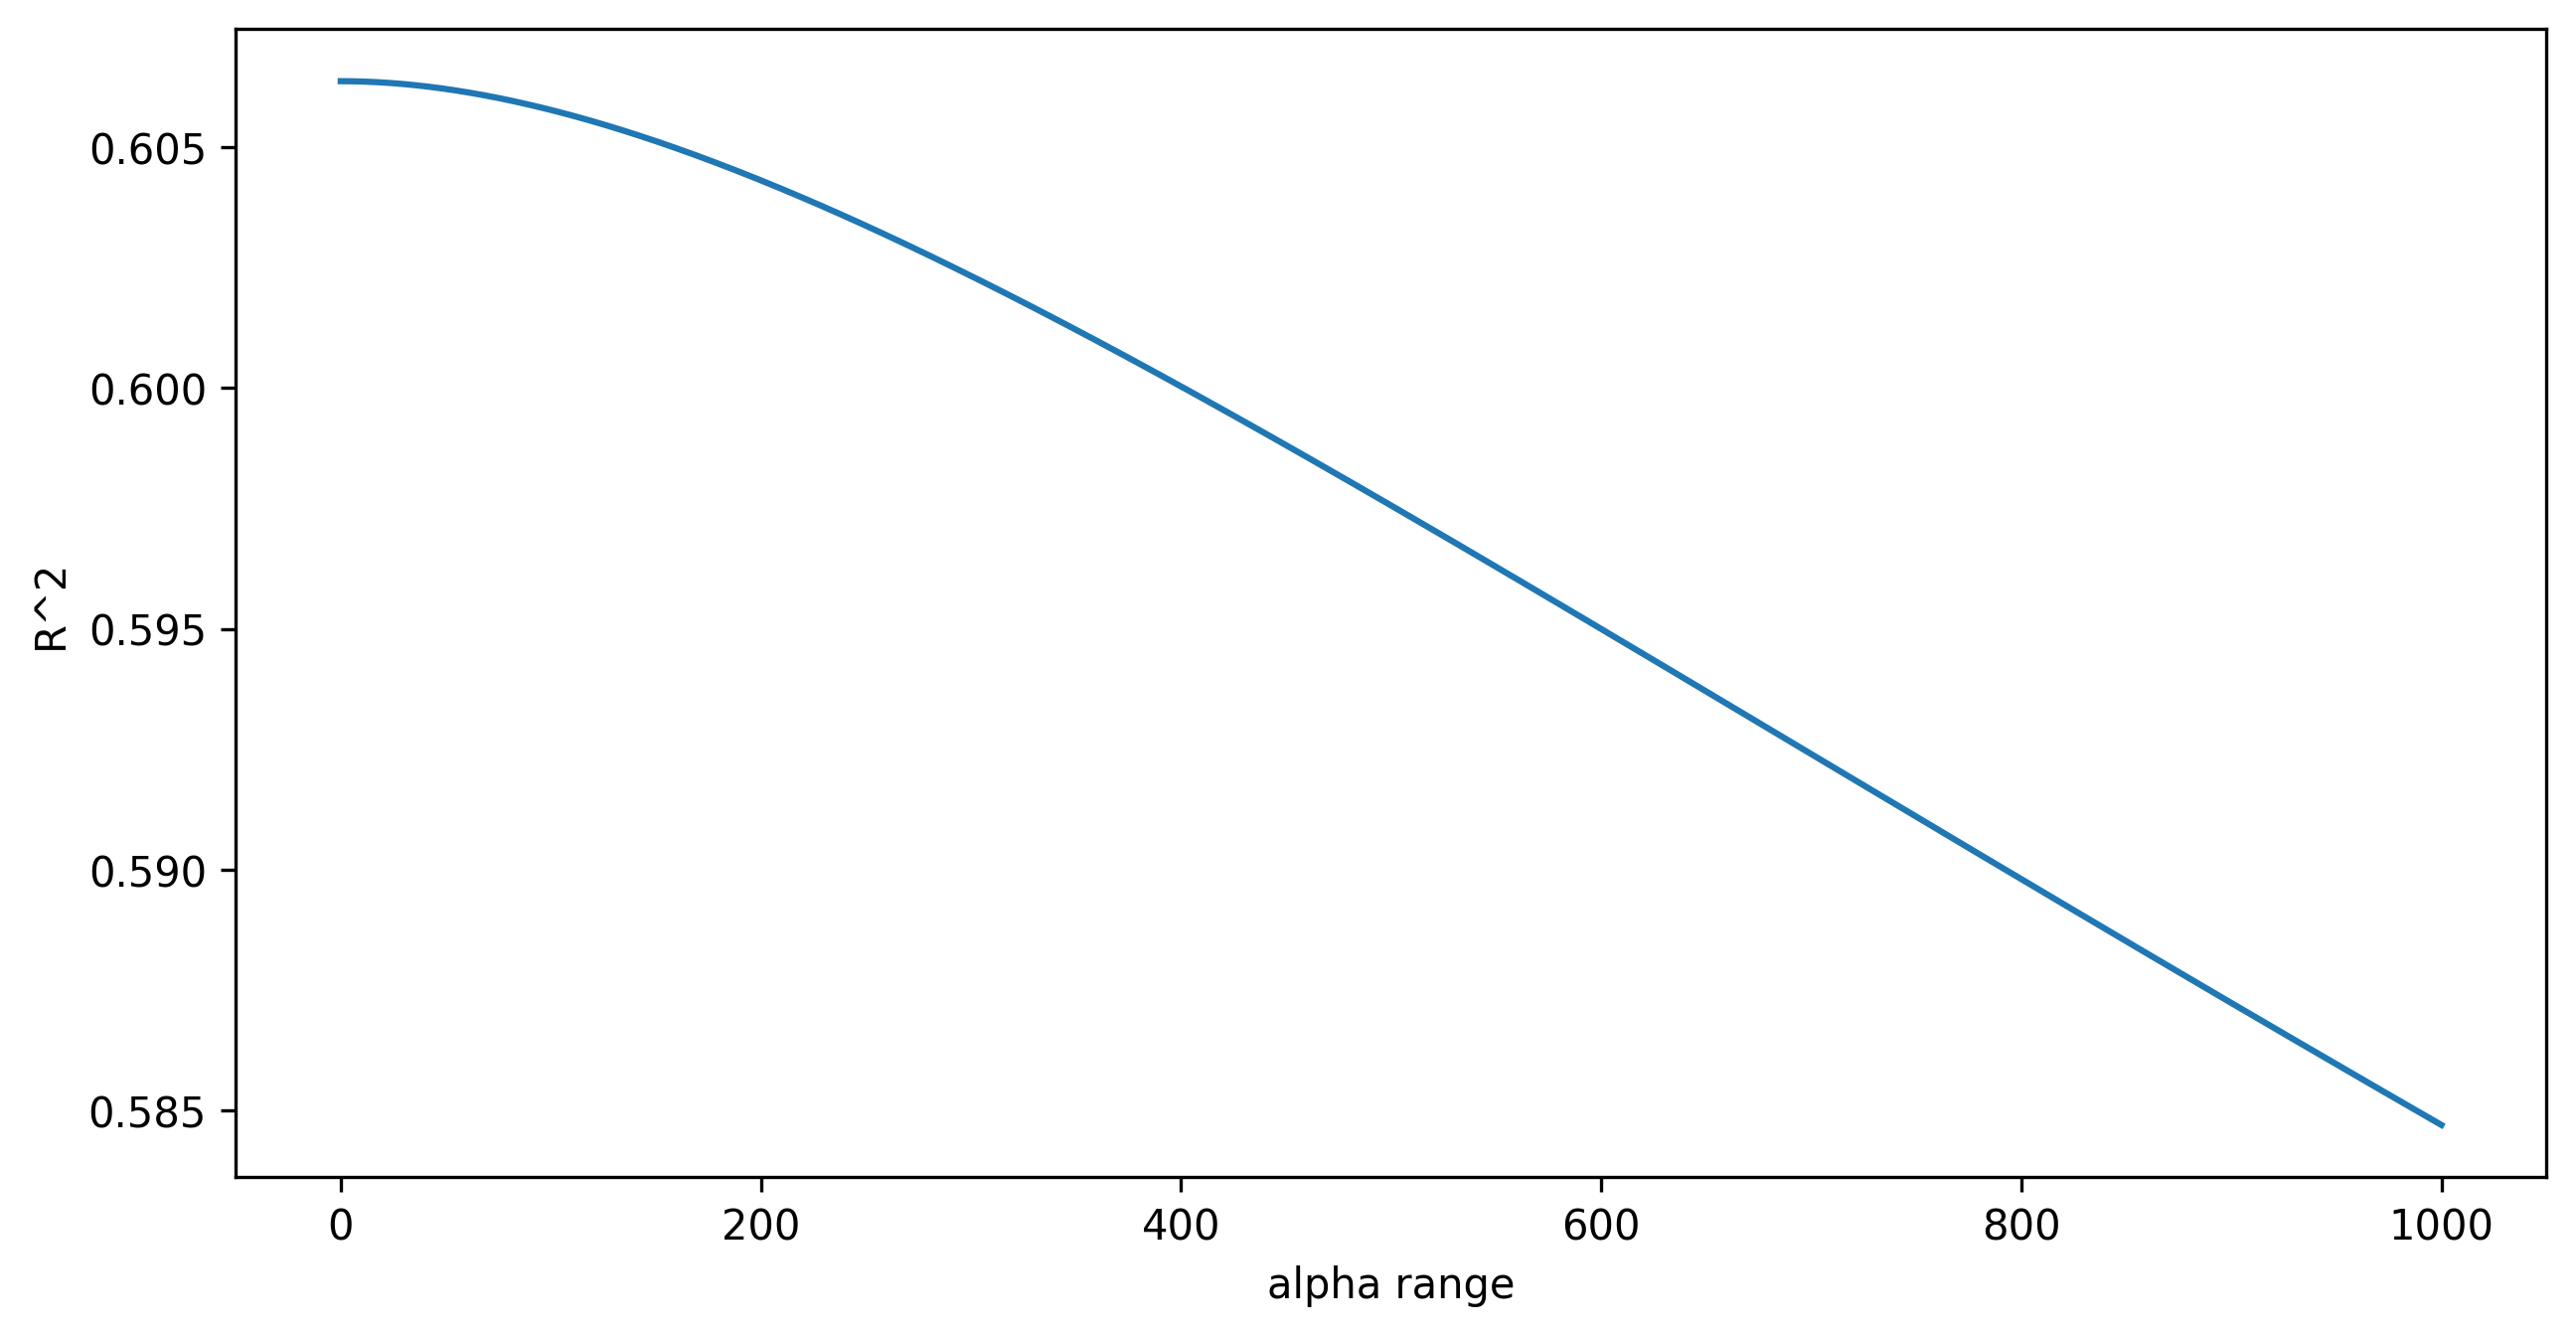

In [12]:
### 可视化展示:
import matplotlib.pyplot as plt

r2, coefs = [],[]
for a in alpha_range:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train_scale, y_train_scale)
    r2.append(ridge.score(X_train_scale, y_train_scale))
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,5), dpi=300)
plt.plot(alpha_range, r2)
plt.xlabel("alpha range")
plt.ylabel("R^2")

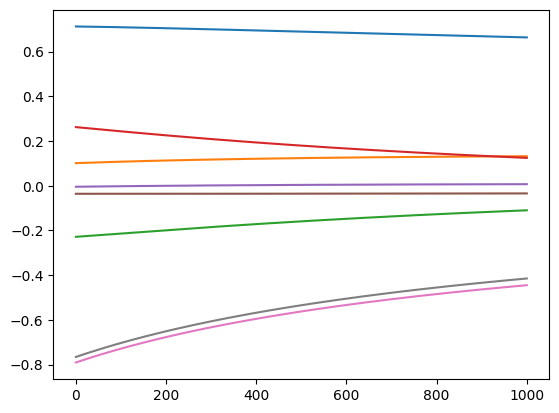

In [13]:
## 惩罚系数对变量系数的影响
plt.plot(alpha_range, coefs);

best alpha is: 54.794723369002874
best mean R2 is: 0.5995772221890945


Text(0, 0.5, 'R^2')

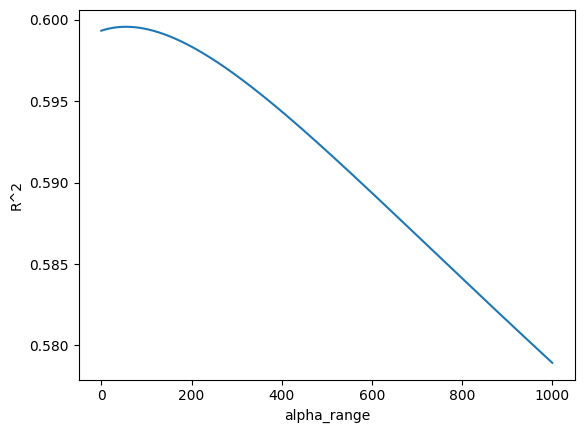

In [ ]:
## 通过Cross-Validation计算范围内最优alpha:
### 对数空间前面很稠密，后面很稀疏
r2 = []
alpha_range = np.logspace(-2,3,1000)

for a in alpha_range:
    ridge = linear_model.Ridge(alpha=a)
    ridge_r2 = cross_val_score(ridge, X_train_scale, y_train_scale, cv=10).mean()
    r2.append(ridge_r2)

best_alpha = alpha_range[r2.index(max(r2))]
print(f"best alpha is: {best_alpha}")
print(f"best mean R2 is: {max(r2)}")

plt.plot(alpha_range, r2)
plt.xlabel("alpha_range")
plt.ylabel("R^2")

In [33]:
# Train Ridge Regression with Best Alpha:
ridge = linear_model.Ridge(alpha=best_alpha)
ridge.fit(X_train_scale, y_train_scale)
ridge.coef_,ridge.intercept_

(array([ 0.71069049,  0.10478958, -0.22045528,  0.25173137, -0.00320464,
        -0.03606685, -0.75530797, -0.73024337]),
 array([-1.90029531e-13]))

## $\S2.2$ LASSO回归

Text(0, 0.5, 'R^2')

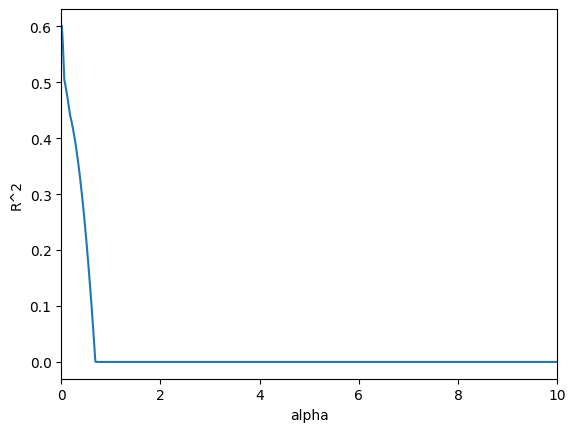

In [ ]:
# 惩罚系数与拟合程度R^2、回归系数的关系:
r2, coefs = [],[]

for a in alpha_range:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train_scale, y_train_scale)
    r2.append(lasso.score(X_train_scale, y_train_scale))
    coefs.append(lasso.coef_)

plt.plot(alpha_range, r2)
plt.gca().set_xlim(0,10)
plt.xlabel("alpha")
plt.ylabel("R^2")

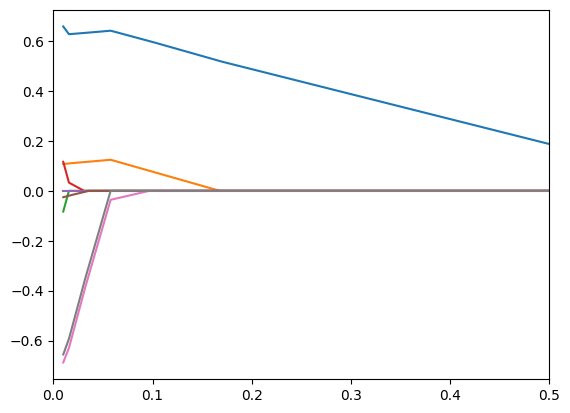

In [43]:
plt.gca().set_xlim(0,0.5)
plt.plot(alpha_range, coefs);